<a href="https://colab.research.google.com/github/Razzf/MachineLearningTests/blob/master/student_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Module installer
#!pip install -U scikit-learn

In [0]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib import style
import pickle


In [108]:
data = pd.read_csv("student-mat.csv", sep=";")
data['paid'] = data['paid'].map({'yes':True, 'no':False})
data['famsup'] = data['famsup'].map({'yes':True, 'no':False})
data['schoolsup'] = data['schoolsup'].map({'yes':True, 'no':False})
data['internet'] = data['internet'].map({'yes':True, 'no':False})
data['romantic'] = data['romantic'].map({'yes':True, 'no':False})
pd.set_option('display.max_columns', data.shape[0]+1)
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures  schoolsup  famsup   paid  \
0  course   mother           2          2         0       True   False  False   
1  course   father           1          2         0      False    True  False   
2   other   mother           1          2         3       True   False   True   
3    home   mother           1          3         0      False    True   True   
4    home   father           1          2         0      False    True   True   

  activities nursery higher  internet  romantic  famrel 

In [0]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences", "traveltime", "famsup", "goout"]]
#print(data.head())

In [0]:
predict = "G3"
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x,y, test_size = .1)

In [153]:
'''best_score = 0
for _ in range(500):
  x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x,y, test_size = .1)
  linear = sk.linear_model.LinearRegression()
  linear.fit(x_train, y_train)
  acc = linear.score(x_test, y_test)
  
  if acc > best_score:
    best_score = acc
    with open("studentmodel", "wb") as f:
      pickle.dump(linear, f)
    print('Accuracy: ', best_score)'''

Accuracy:  0.7928606134907055
Accuracy:  0.8424266304217255
Accuracy:  0.8491932580018431
Accuracy:  0.8653145898502158
Accuracy:  0.9021356051408073
Accuracy:  0.9120269737147482
Accuracy:  0.9334763305532904
Accuracy:  0.9706027420756225


In [0]:
pickle_in = open("studentmodel", "rb")
linear = pickle.load(pickle_in)

In [113]:
print('Coeficients: ', linear.coef_)
print('intercepts: ', linear.intercept_)

Coeficients:  [ 0.18868697  0.96995209 -0.17461731 -0.22903095  0.04454155  0.15683437
  0.10011368  0.50567531 -0.12770339 -0.3630273   0.06947123  0.11740903]
intercepts:  -2.6377711742122187


In [156]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
  print('prediction: ', predictions[x], "| Actual result: ", y_test[x])

prediction:  6.365089885952274 | Actual result:  6
prediction:  6.89428621804333 | Actual result:  8
prediction:  7.5773712912189275 | Actual result:  8
prediction:  8.992349137047352 | Actual result:  10
prediction:  8.33706172732569 | Actual result:  10
prediction:  11.655239237212268 | Actual result:  12
prediction:  12.182849260836981 | Actual result:  13
prediction:  11.646095752341633 | Actual result:  12
prediction:  7.076205445261598 | Actual result:  8
prediction:  15.279514736314344 | Actual result:  16
prediction:  15.46432444362464 | Actual result:  15
prediction:  7.653779249255063 | Actual result:  0
prediction:  13.04042555410804 | Actual result:  12
prediction:  11.751817103681661 | Actual result:  13
prediction:  8.064608042223895 | Actual result:  8
prediction:  15.75517519003343 | Actual result:  15
prediction:  14.42005784088159 | Actual result:  14
prediction:  8.435696134682399 | Actual result:  9
prediction:  7.396382401674012 | Actual result:  6
prediction:  10.

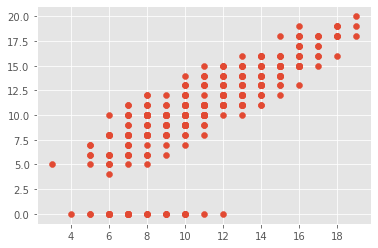

In [158]:
p = 'G1'
style.use("ggplot")
plt.scatter(data[p], data['G3'])
plt.xlabel = 'G1 \n\n asd'
plt.ylabel = 'final grade'
#plt.xlabel("G1")
#plt.ylabel("Final Grade")
plt.show()